In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *
from score_individual_objects import *

%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
obs_clusters = cmbo.io.load_observed_clusters(cfg['paths']['observed_clusters'])


In [3]:
associations, matches, boxsize = load_associations_and_matches("csiborg2", cfg)

Loaded 20 simulation realisations.
Identified 358 halo associations.
Loaded 19 observed clusters.


100%|██████████| 358/358 [00:02<00:00, 164.10it/s]


Perseus (A426): min p-value = 9.167e-01
Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=9.335e-02)
Cluster 18 (Perseus (A426)) now orphaned (best remaining p=9.167e-01)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=1.303e-01)


KeyError: "Simulation group '15517' missing from /Users/rstiskalek/Projects/CMBOlympics/results/csiborg2.hdf5."

In [10]:
associations[0]

HaloAssociation(label=0, centroid=array([224.77907104, 291.64536896, 262.97666626]), positions=array([[224.57981873, 292.04376221, 262.71691895],
       [225.40574646, 291.99880981, 263.43411255],
       [224.95187378, 291.83914185, 263.1572876 ],
       [224.48774719, 291.78378296, 263.2074585 ],
       [224.36502075, 291.70385742, 263.23007202],
       [224.5670929 , 291.91925049, 263.03079224],
       [224.61201477, 291.37744141, 263.03952026],
       [224.86412048, 291.79815674, 263.02337646],
       [224.76126099, 291.67538452, 262.78033447],
       [225.14498901, 291.66360474, 263.51013184],
       [224.65383911, 291.81616211, 262.98135376],
       [224.88806152, 291.63864136, 263.42498779],
       [225.04040527, 291.34124756, 262.63549805],
       [225.1879425 , 291.30581665, 262.8270874 ],
       [224.56997681, 291.43017578, 262.19122314],
       [225.25628662, 291.68295288, 263.53857422],
       [225.37272644, 291.47470093, 262.92895508],
       [224.34309387, 291.29226685, 26

In [ ]:
fname = "../data/csiborg2_fof.hdf5"
# fname = "../data/manticore_fof.hdf5"


# optional_keys = ["R500c", ]
optional_keys = ["Group_R_Crit500", ]

positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    fname, "Coordinates", "Group_M_Crit500", optional_keys=optional_keys)
    # fname, "Position", "M500c", optional_keys=optional_keys)

# positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    # fname, "Position", "M200c", optional_keys=optional_keys)

# boxsize = 677.7
boxsize = 676.6
# boxsize = 681.0

obs_pos = np.full((3,), boxsize / 2)

associations = cmbo.utils.identify_halo_associations(positions, masses, optional_data=optional_data)
pval, dist = cmbo.utils.compute_matching_matrix(obs_clusters, associations, boxsize)
matches = cmbo.utils.greedy_global_matching(pval, dist, obs_clusters, associations, 0.05)

100%|██████████| 218/218 [00:01<00:00, 143.40it/s]

Virgo Cluster: min p-value = 6.168e-02
Perseus (A426): min p-value = 1.000e+00
Cluster 14 (Virgo Cluster) now orphaned (best remaining p=6.168e-02)
Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=2.900e-01)
Cluster 18 (Perseus (A426)) now orphaned (best remaining p=1.000e+00)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=1.829e-01)


In [416]:
# fig, ax = plot_mass_extent_scaling(matches, obs_clusters, 0.3)

In [417]:
from copy import deepcopy

# matches_cb2 = deepcopy(matches)
# matches_cb1 = deepcopy(matches)
# matches_manti = deepcopy(matches)


In [418]:
for obs in obs_clusters:
    print(obs.name, obs.galactic_coordinates)

Abell 1644 (304.87848734499676, 45.44983526231966)
Abell 119 (125.71403418797543, -64.0621200480145)
Abell 548 (230.2867512264064, -24.816846955401463)
Abell 1736 (312.56915629264466, 35.02393080946)
Abell 496 (209.58495110271414, -36.48482796375763)
Hydra (A1060) (269.5963450336094, 26.488146436150636)
Centaurus (A3526) (302.39893715528524, 21.56123792614916)
Hercules (A2199) (62.93065353551864, 43.694234258689086)
Hercules (A2147) (28.970239741075694, 44.53523517558535)
Hercules (A2063) (12.847908047135522, 49.71333936791619)
Hercules (A2151) (31.58768705457708, 44.52158882172646)
Leo (A1367) (235.08412035719311, 73.01502891678268)
Coma (A1656) (58.08120065346253, 87.95755439282333)
Norma (A3627) (325.25546536180593, -7.128051383242348)
Virgo Cluster (283.80738728835604, 74.43686740194173)
Shapley (A3571) (316.3196983753959, 28.561106515543813)
Shapley (A3558) (311.98705005592825, 30.726304418560474)
Shapley (A3562) (313.32894138911945, 30.357912606351945)
Perseus (A426) (150.5724807

In [419]:
fig, ax = plot_mass_comparison(matches_manti, matches_cb1, obs_clusters, labels=["CSiBORG2", "CSiBORG1"], )

# fig.savefig("/Users/rstiskalek/Downloads/cluster_mass_comparison_manticore_cb1.png", dpi=450)

display(fig)

NameError: name 'matches_manti' is not defined

In [420]:
obs_pos = np.full((3,), boxsize / 2)

# cmbo.corr.measure_mass_matched_catalog(
#     obs_clusters, matches, obs_pos, Om=0.306,
#     source_scale=1,
#     bkg_inner_scale=2.5)

In [421]:
obs_clusters.names

['Abell 1644',
 'Abell 119',
 'Abell 548',
 'Abell 1736',
 'Abell 496',
 'Hydra (A1060)',
 'Centaurus (A3526)',
 'Hercules (A2199)',
 'Hercules (A2147)',
 'Hercules (A2063)',
 'Hercules (A2151)',
 'Leo (A1367)',
 'Coma (A1656)',
 'Norma (A3627)',
 'Virgo Cluster',
 'Shapley (A3571)',
 'Shapley (A3558)',
 'Shapley (A3562)',
 'Perseus (A426)']

In [422]:
obs_clusters.names[2]

'Abell 548'

In [438]:
matches_here = deepcopy(matches)
# matches_here[-3] = None
# matches_here[-6] = None
# matches_here[7] = None
# matches_here[2]  = None

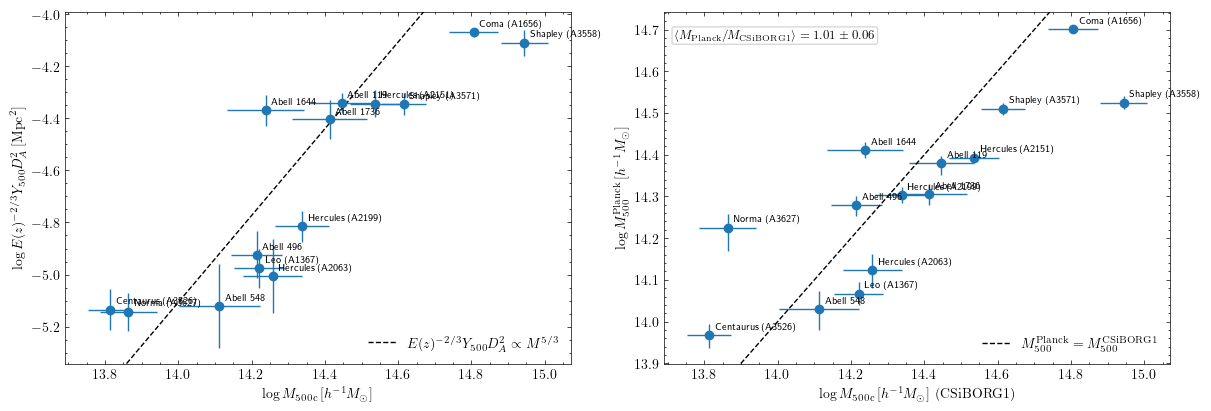

In [442]:
fig, ax, data= plot_mass_y_scaling(matches_here, obs_clusters, 0.30, sim_label="CSiBORG1", )

# fig.savefig("/Users/rstiskalek/Downloads/CB1_mass_y_scaling_single_clusters.png", dpi=300)

display(fig)

In [443]:
np.log10(0.7)

np.float64(-0.1549019599857432)

In [444]:
xobs = data['x'] - np.log10(6e14) #- np.log10(0.7)
xerr = data['xerr'] #- np.log10(0.7)

yobs = data['y']
yerr = data['yerr']


from roxy.regressor import RoxyRegressor

def my_fun(x, theta):
    return theta[0] * x + theta[1]

theta0 = [2, -20]
param_names = ['A', 'B']
param_prior = {'A':[-10, 10], 'B':[-20, 5], 'sig':[0.1, 3.0]}

reg = RoxyRegressor(my_fun, param_names, theta0, param_prior)

nwarm = 500
nsamp = 20000

res = reg.mcmc(param_names, xobs, yobs, [xerr, yerr], nwarm, nsamp, method="mnr")


Optimisation Results:
A:	1.1551567316055298
B:	-4.140384674072266
sig:	0.11400441825389862
mu_gauss:	-0.42570823431015015
w_gauss:	0.3036969304084778

Running MCMC


sample: 100%|██████████| 20500/20500 [00:03<00:00, 6132.76it/s, 3 steps of size 3.54e-01. acc. prob=0.92] 


                mean       std    median      2.5%     97.5%     n_eff     r_hat
         A      1.14      0.18      1.14      0.78      1.51   8965.72      1.00
         B     -4.15      0.09     -4.15     -4.34     -3.97   8499.55      1.00
  mu_gauss     -0.43      0.10     -0.43     -0.61     -0.22  10199.29      1.00
       sig      0.17      0.05      0.16      0.10      0.27  15041.26      1.00
   w_gauss      0.35      0.08      0.34      0.21      0.51  11625.43      1.00

Number of divergences: 0


In [436]:
x = (10**(res['B']) / 10**(-4.19))
x.mean(), x.std()

(Array(0.8348813, dtype=float32), Array(0.18379551, dtype=float32))

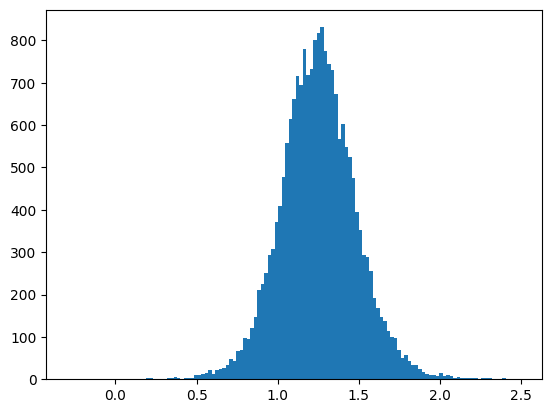

In [437]:
plt.figure()
plt.hist(res['A'], bins="auto")
plt.show()

In [429]:
1 / (10**(-4.5) / 10**(-4.19))

2.0417379446695274

In [430]:
xrange = np.linspace(xobs.min(), xobs.max(), 100)

yf = np.vstack([my_fun(xrange, [res['A'][i], res['B'][i]]) for i in range(len(res['A']))]).T

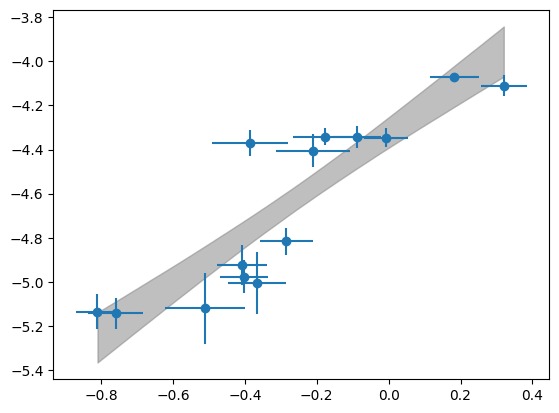

In [431]:
ylow, yhigh = np.percentile(yf, [16, 84], axis=1)

plt.figure()
plt.errorbar(xobs, yobs, xerr=xerr, yerr=yerr, fmt='o', label='Observed data')

plt.fill_between(xrange, ylow, yhigh, color='gray', alpha=0.5, label='68% credible interval')

plt.show()


In [175]:
theta200

array([49.84655391, 50.10612032, 51.43168153, 48.65702963, 46.62466983,
       47.27785056, 49.28818766, 42.35262587, 51.71431719, 52.26329754,
       52.0405131 , 51.88976033, 51.33369645, 51.18856746, 49.97098521,
       48.3416996 , 54.37679905, 51.89913632, 50.09704669, 51.20462721])

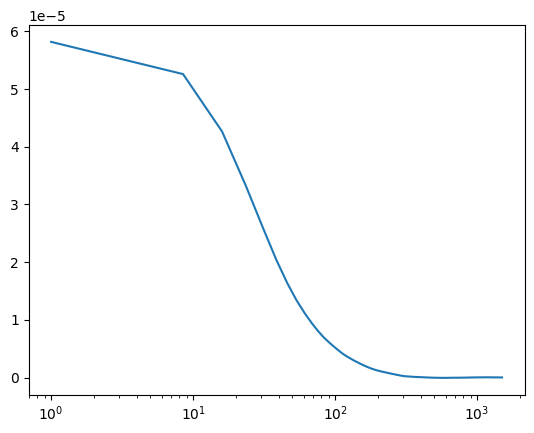

In [68]:
plt.figure()
plt.plot(obs.map_fit["radii_arcmin"], obs.map_fit["signal_profile"])

plt.xscale("log")
# plt.yscale("log")

plt.show()

In [45]:
theta200 * 5

array([181.04767857, 158.4564201 , 164.95567952, 169.80661253,
       162.39029865, 151.66998978, 187.53337694, 152.90605439,
       161.7977774 , 168.32857604, 169.14048721, 168.61287787,
       178.28653836, 160.53616811, 184.19832759, 162.97001156,
       150.99526021, 189.20547296, 199.34786775, 189.76769369,
       159.19670091, 170.15567599, 187.95392629, 161.58864019,
       192.07198278, 167.15025523, 195.08488347, 176.92385247,
       178.4606288 , 214.59753403, 180.92021308, 183.59661709,
       177.41314819, 183.16152606, 176.26464287, 148.94030694,
       175.458316  , 165.05996104, 169.75974595, 171.46359017,
       180.82892288, 164.66626728, 180.33813223, 165.43218628,
       171.86225913, 170.31116569, 165.46058832, 151.1079238 ,
       168.87595673, 188.40982214])

In [25]:
cmbo.corr.measure_mass_matched_cluster(obs, assoc, obs_pos, Om=0.3,)

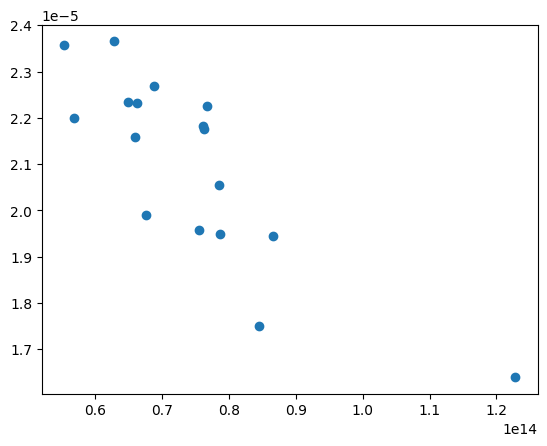

In [26]:
plt.figure()
plt.scatter(assoc.masses, assoc.optional_data["Y_corrected"],)
# plt.xscale("log")
# plt.yscale("log")

plt.show()

In [8]:
obs = obs_clusters[k]
print(obs.galactic_coordinates)
print(obs.map_fit["ell"], obs.map_fit["b"])

(316.3196983753959, 28.561106515543813)
316.2942961682229 28.527767755450697


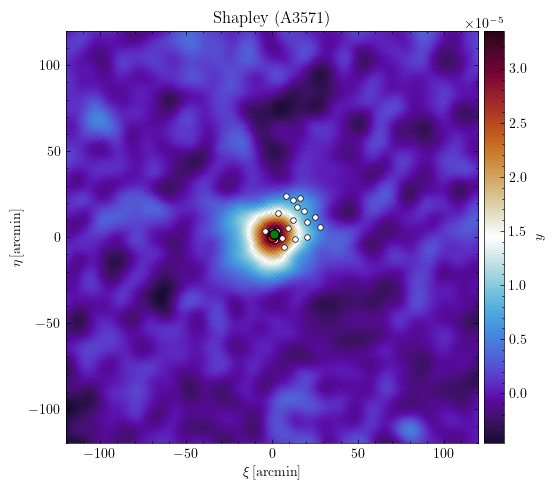

In [9]:
fig, ax = plot_observed_cluster_cutout(
    obs_clusters[k],
    association=assoc,
    obs_pos=obs_pos,
    zoom_arcmin=None)

# fig.savefig(f"Manticore_Coma.png", dpi=150)
display(fig)

Plotting 17/19 matched clusters
Skipping 2 unmatched: ['Hercules (A2151)', 'Shapley (A3562)']


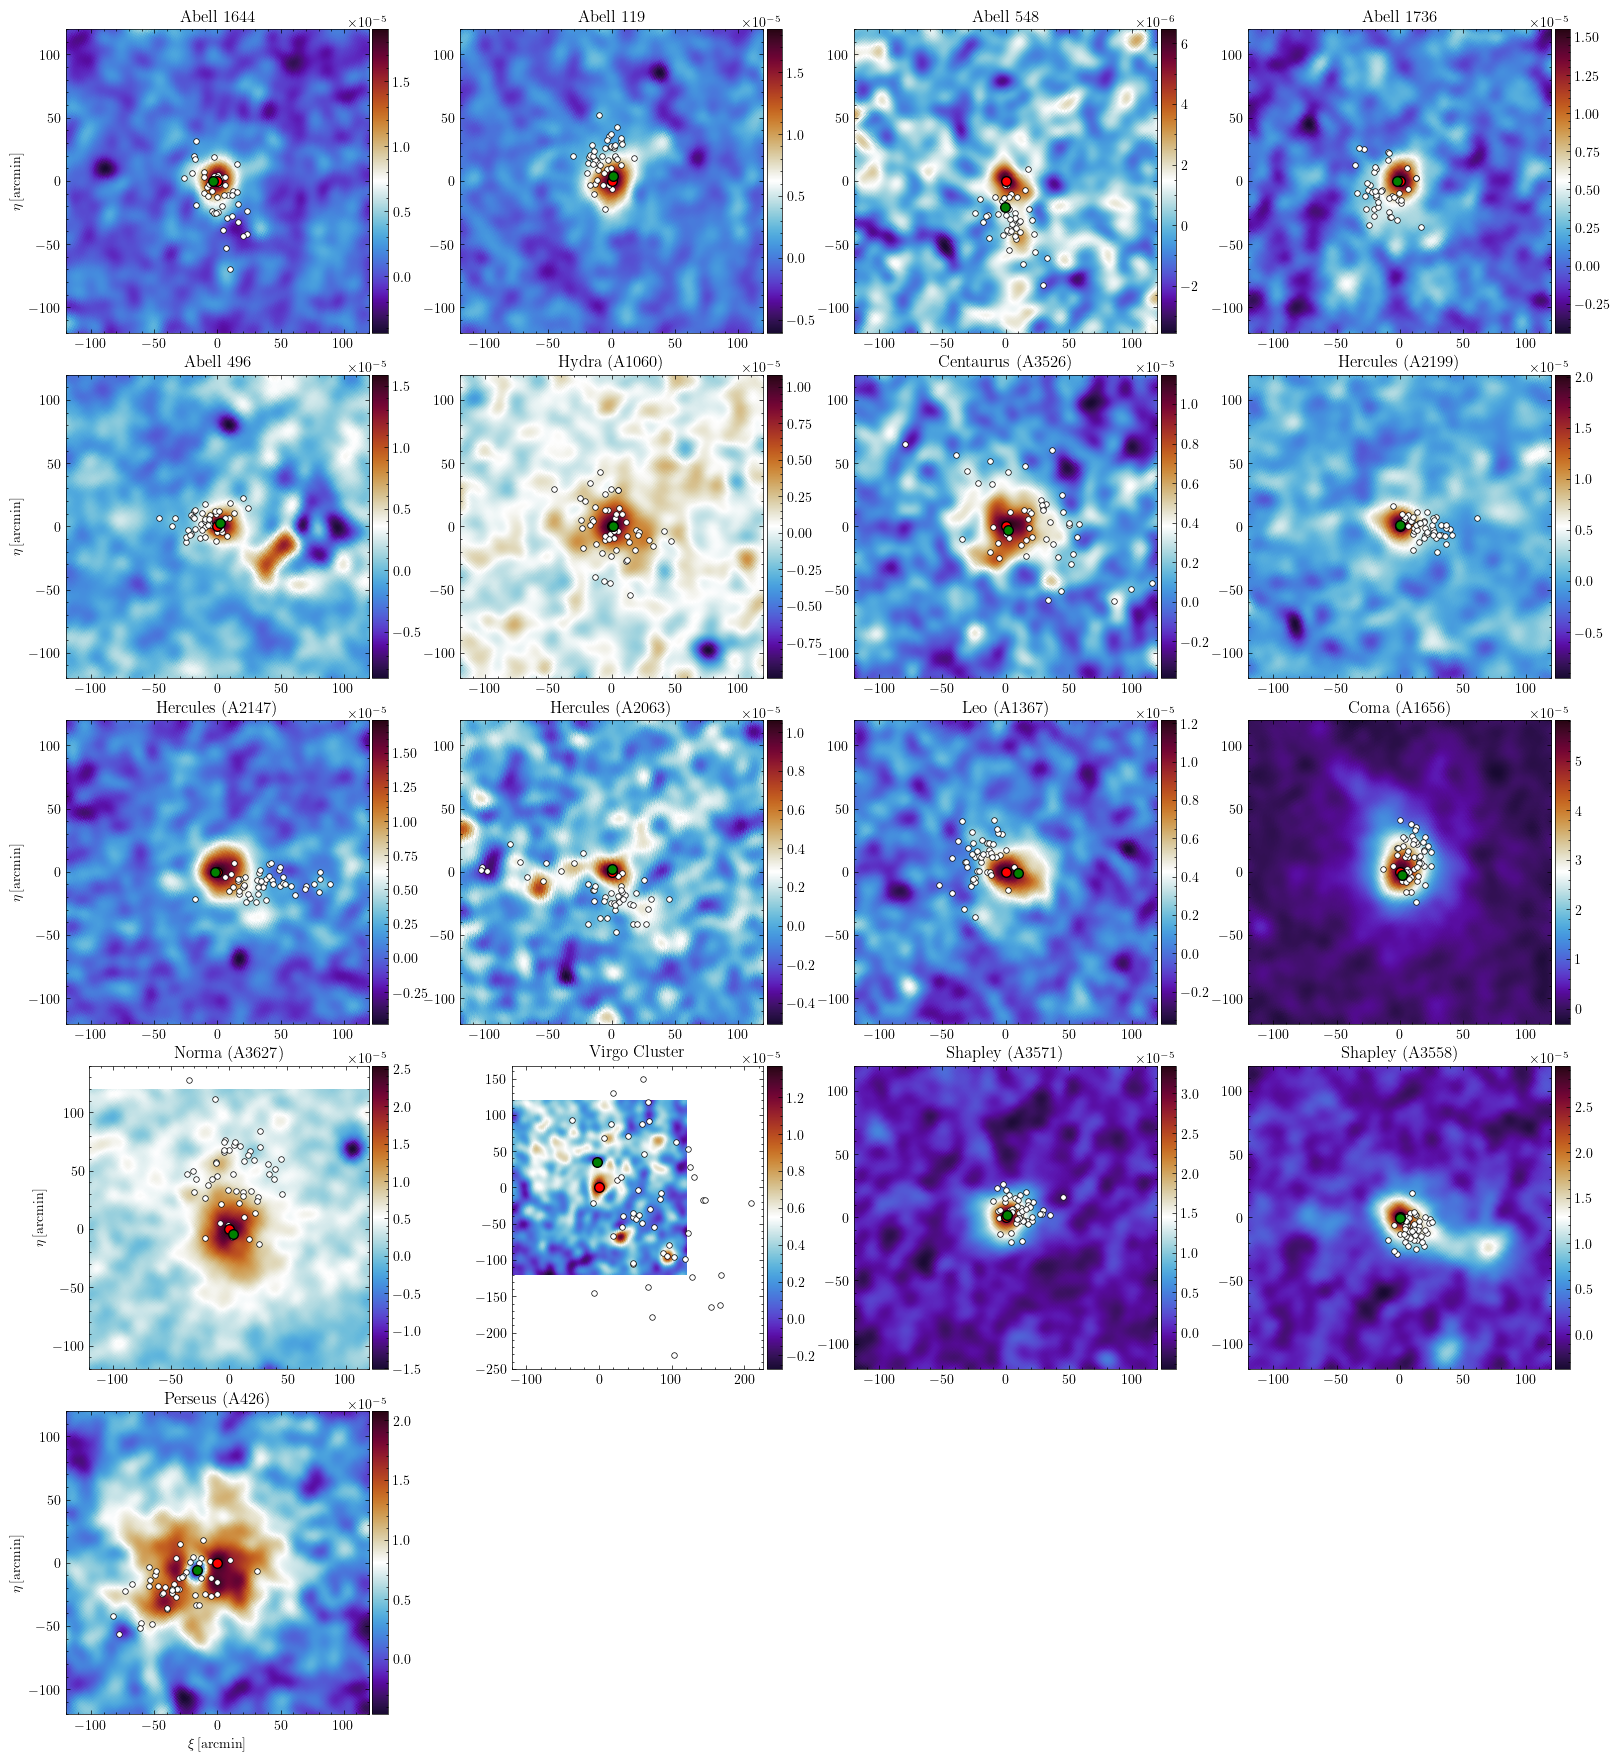

In [35]:
fig, ax = plot_observed_cluster_grid(obs_clusters, matches, boxsize,)


fig.savefig(f"/Users/rstiskalek/Downloads/manticore_grid.png", dpi=450, bbox_inches='tight', pad_inches=0.05)
display(fig)

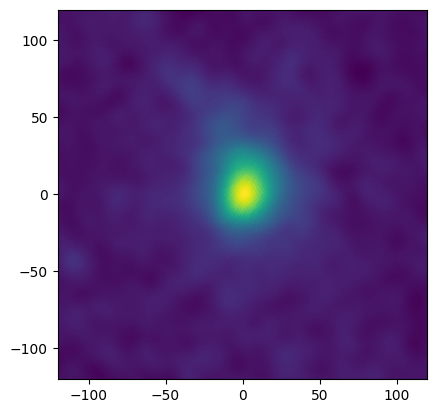

In [23]:
k = 12

obs = obs_clusters[k]


# The map is centered on:
obs.map_fit["ell"], obs.map_fit["b"]


# Plot on it as a red dot this observed position (tuple of numbers in degrees in galactic)
obs.galactic_coordinates

plt.figure()
plt.imshow(obs.map_fit["cutout"], origin="lower", extent=obs.map_fit["extent"])


plt.show()


In [14]:
obs.map_fit["ell"], obs.map_fit["b"]

(57.08531415929335, 88.00239249385237)

In [251]:
cutout_gen = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

size_arcmin = 180

cut, ext = cutout_gen.get_cutout_2d(ell_deg=ellc, b_deg=bc, size_arcmin=size_arcmin)

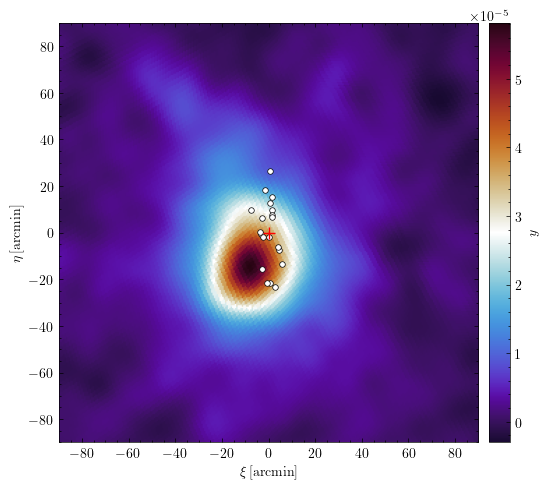

In [252]:
fig, ax = plot_cluster_cutout(cut, ext, ell, b, ellc, bc)

fig.savefig(f"cluster_{obs_clusters.names[k].replace(' ', '_')}.png", dpi=300)

display(fig)
plt.close("all")

In [268]:
profiler = cmbo.corr.PointingEnclosedProfile(cmb_tsz, )

In [269]:
cmbo.utils.compute_association_signals(
    associations, profiler, obs_pos, theta_rand, tsz_rand_signal, theta_rand_bg, tsz_rand_background,
    background_radius_norm=1.25)

Computing association signals: 100%|██████████| 358/358 [01:32<00:00,  3.88it/s]


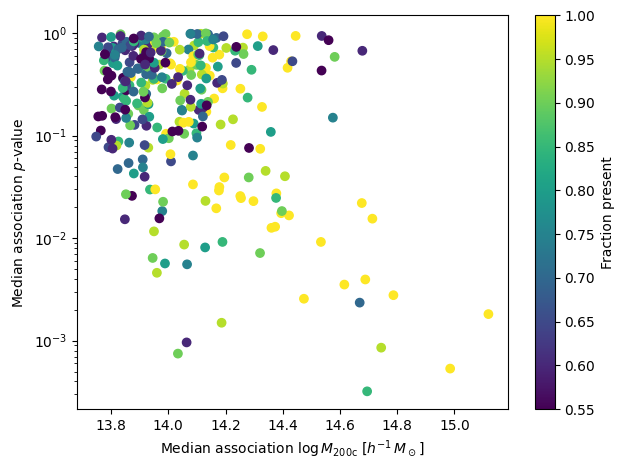

In [273]:
x = np.asanyarray([np.log10(np.median(assoc.masses)) for assoc in associations])
y = np.asanyarray([assoc.median_pval for assoc in associations])
f = np.asanyarray([assoc.fraction_present for assoc in associations])


mask_f = f > 0.5

plt.figure()
plt.scatter(x[mask_f], y[mask_f], c=f[mask_f], cmap="viridis")
plt.colorbar(label="Fraction present")
plt.xlabel(r"Median association $\log M_\mathrm{200c} ~ [h^{-1}\,M_\odot]$")
plt.ylabel("Median association $p$-value")
plt.yscale("log")
plt.tight_layout()

plt.savefig("/Users/rstiskalek/Downloads/association_plot.png", dpi=300)

plt.show()